In [31]:
import IPythonImporter
import GameFramework as gf
import SequentialReverseAuction as srg
import Shapley as sh

import time
import numpy as np
import matplotlib.pyplot as plt
from pathos.multiprocessing import ProcessingPool

In [2]:
# Generiere Szenarien
sc = gf.generateScenaries(agentsNumber=2, sitesNumber=2, skillsNumber=2, \
                          capacitiesNumber=(1,2), requestsNumber=(1,3))

print "Anzahl an Szenarien: " + str(len(sc))

Anzahl an Szenarien: 4096


In [3]:
# multiprocessing shapley
# start = time.time()
# results_shapley = ProcessingPool().map(sh.shapley, sc)
# end = time.time()
# print "Processing Time Shapley: " + str(end - start)

In [4]:
# multiprocessing SRG
# start = time.time()
# results_srg = ProcessingPool().map(srg.sequentialReverseAuction, sc)
# end = time.time()
# print "Processing Time SRG: " + str(end - start)

In [5]:
# aus Datei laden
results_shapley = np.load('shapley.out.npy')
results_srg = np.load('srg.out.npy')

In [6]:
# Shapley aufbereiten
res_s = [r[2].values() for r in results_shapley if r != None]
ar_s = np.zeros((len(res_s), 2), dtype=np.dtype(int))

for idx, r in enumerate(res_s):
    ar_s[idx] = r

In [7]:
# srg aufbereiten
res_r = [r[:,1] for r in results_srg if r is not None]
ar_r = np.zeros((len(res_r), 2), dtype=np.dtype(int))

for idx, r in enumerate(res_r):
    if len(r) == 1: 
        ar_r[idx] = [int(r[0]), 0]
    else:
        ar_r[idx] = [int(r[0]), int(r[1])]

Anzahl an Szenarien mit mindestens einer gebauten Baustelle
Shapley: 3087 von 4096, 75%
SRG: 2304 von 4096, 56%


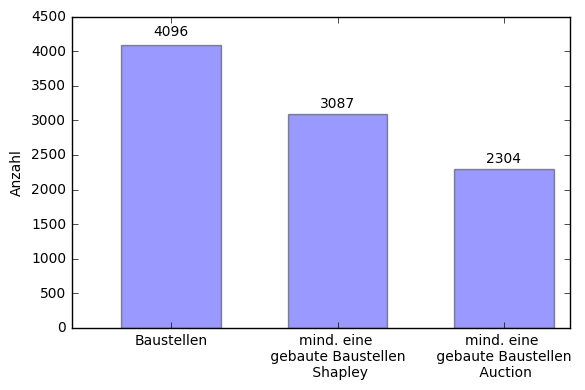

In [61]:
# Wie viele Szenarien haben eine Auszahlung?
print "Anzahl an Szenarien mit mindestens einer gebauten Baustelle"
print "Shapley: " + str(ar_s.shape[0]) + " von " + str(len(sc)) + ", " + str(int((float(ar_s.shape[0])/len(sc))*100)) + "%"
print "SRG: " + str(ar_r.shape[0]) + " von " + str(len(sc)) + ", " + str(int((float(ar_r.shape[0])/len(sc))*100)) + "%"

n_groups = 3
finished = (len(sc), ar_s.shape[0], ar_r.shape[0])
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.6
opacity = 0.4

rects1 = plt.bar(index+bar_width/2, finished, bar_width,
                 alpha=opacity,
                 color='b')

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

plt.ylabel('Anzahl')
plt.xticks(index + bar_width, ('Baustellen', 'mind. eine \n gebaute Baustellen \n Shapley', 'mind. eine \n gebaute Baustellen \n Auction'))

plt.tight_layout()
plt.show()

In [38]:
shapley_umsatz = np.sum(ar_s)
shapley_sum_max = np.sum(ar_s.max(axis=1))
shapley_sum_min = np.sum(ar_s.min(axis=1))

shapley_umsatz_a = int(float(shapley_umsatz)/ar_s.shape[0]/2)
shapley_sum_max_a = int(float(shapley_sum_max)/ar_s.shape[0]/2)
shapley_sum_min_a = int(float(shapley_sum_min)/ar_s.shape[0]/2)

61


In [44]:
srg_umsatz = np.sum(ar_r)
srg_sum_max = np.sum(ar_r.max(axis=1))
srg_sum_min = np.sum(ar_r.min(axis=1))    

srg_umsatz_a = int(float(srg_umsatz)/ar_r.shape[0]/2)
srg_sum_max_a = int(float(srg_sum_max)/ar_r.shape[0]/2)
srg_sum_min_a = int(float(srg_sum_min)/ar_r.shape[0]/2)
print int((float(srg_sum_min)/srg_sum_max)*100)

18


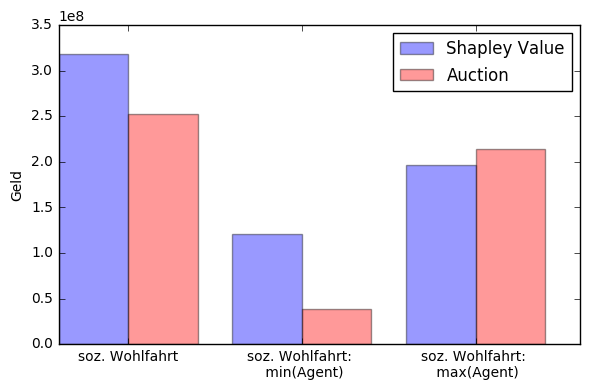

In [40]:
n_groups = 3
srg = (srg_umsatz, srg_sum_min, srg_sum_max)
shapley = (shapley_umsatz, shapley_sum_min, shapley_sum_max)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.4

rects1 = plt.bar(index, shapley, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Shapley Value')

rects2 = plt.bar(index + bar_width, srg, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Auction')

plt.ylabel('Geld')
plt.xticks(index + bar_width, ('soz. Wohlfahrt', 'soz. Wohlfahrt: \n min(Agent)', 'soz. Wohlfahrt: \n max(Agent)'))
plt.legend()

plt.tight_layout()
plt.show()

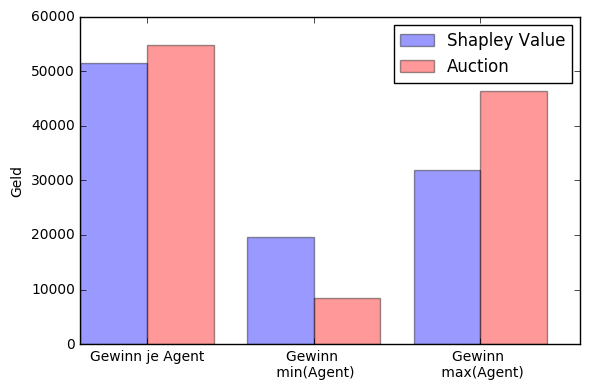

In [42]:
n_groups = 3
srg = (srg_umsatz_a, srg_sum_min_a, srg_sum_max_a)
shapley = (shapley_umsatz_a, shapley_sum_min_a, shapley_sum_max_a)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.4

rects1 = plt.bar(index, shapley, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Shapley Value')

rects2 = plt.bar(index + bar_width, srg, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Auction')

plt.ylabel('Geld')
plt.xticks(index + bar_width, ('Gewinn je Agent', 'Gewinn \n min(Agent)', 'Gewinn \n max(Agent)'))
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
# Unterschied
print "Shapley Unterschied max(Agent) und min(Agent):"
print str(int((float(shapley_sum_min)/shapley_sum_max)*100)) + "%"
print ""
print "SRG Unterschied max(Agent) und min(Agent):"
print str(int((float(srg_sum_min)/srg_sum_max)*100)) + "%"

Shapley Unterschied max(Agent) und min(Agent):
61%

SRG Unterschied max(Agent) und min(Agent):
18%


In [ ]:
float(shapley_sum_min)/shapley_sum_max)